<h1 align="center" style="color:Green">Health Insurance Premium Prediction</h1>

---

## 🎯 Objective  

The objective of this project is to develop a **regression model** that can accurately predict the **insurance premium amount** based on various features provided in the dataset. By analyzing the relationship between factors such as **age**, **income**, **health score**, **policy type**, and **claim history**, the goal is to:

---

### 🚀 Steps Followed  

1. **🔍 Exploratory Data Analysis (EDA):**  
   - Understand the structure and distribution of the data.  
   - Identify patterns, correlations, and outliers within the dataset.  

2. **🛠️ Data Preprocessing:**  
   - Handle missing values, if any.  
   - Encode categorical features (e.g., **Gender**, **Policy Type**).  
   - Scale numerical features to ensure consistency across the dataset.  

3. **📊 Model Development:**  
   Train multiple regression models to predict the insurance premium, including:  
   - **Linear Regression**  
   - **Ridge Regression**  
   - **XGBoost Regressor**  

4. **📈 Model Evaluation:**  
   Evaluate the performance of the models using the following metrics:  
   - ✅ **Mean Absolute Error (MAE)**  
   - ✅ **Root Mean Squared Error (RMSE)**  
   - ✅ **R² Score**  

5. **🔎 Model Comparison and Insights:**  
   - Compare the performance of all trained models based on the evaluation metrics.  
   - Identify the most significant features that influence the **premium amount**.  

---

### 🎯 Final Goal  

The final goal is to build a **robust** and **efficient** predictive model that assists insurance companies in determining **premium amounts** with **high accuracy** and **reliability**.  

---


<h2 align="center" style="color:blue">Import Necessary Packages</h2>

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

<h2 align="center" style="color:blue">Data Loading</h2>

### Dataset

Here is a Regression problem to predict the **Annual_Premium_Amount** of insurance plans. Here i have have been provided with a dataset named **`"premiums.xlsx"`**, which includes various parameters that influence the premium amount. The dataset comprises the following columns:

- `Age:` The age of the individual.  
- `Gender:` The gender of the individual (Male/Female).  
- `Region:` The residential region (e.g., Northeast).  
- `Marital_status:` The marital status of the individual (e.g., Married, Unmarried).  
- `Number Of Dependants:` The number of dependents.  
- `BMI_Category:` The BMI classification (e.g., Normal, Overweight).  
- `Smoking_Status:` The smoking habits of the individual (e.g., Regular, No Smoking).  
- `Employment_Status:` The employment type (e.g., Salaried, Freelancer).  
- `Income_Level:` The income category (e.g., <10L, >40L).  
- `Income_Lakhs:` The annual income in lakhs.  
- `Medical History:` The past medical conditions of the individual (e.g., Diabetes).  
- `Insurance_Plan:` The type of insurance policy (e.g., Silver, Bronze).  
- `Annual_Premium_Amount:` The target column representing the premium cost.  
- `Genetical_Risk:` The genetic health risk score.

Herec i used this dataset to build and evaluate machine learning models to predict the **Annual_Premium_Amount** based on the given parameters.

**Dataset Link:** .


In [48]:
df = pd.read_excel("premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4.0
1,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3.0
2,18,Female,Southeast,Unmarried,1,Normal,Occasional,Freelancer,<10L,8,Diabetes & High blood pressure,Bronze,8111,3.0


In [49]:
df.shape

(50000, 14)

In [50]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4.0
1,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3.0
2,18,Female,Southeast,Unmarried,1,Normal,Occasional,Freelancer,<10L,8,Diabetes & High blood pressure,Bronze,8111,3.0


#### Purpose: Standardizes column names by replacing spaces with underscores and converting to lowercase.

<h2 align="center" style="color:blue">Exploratory Data Analysis & Data Cleaning</h2>

### Handle Missing Values

In [51]:
df.isna().sum()

age                          0
gender                       0
region                       0
marital_status               0
number_of_dependants         0
bmi_category                 0
smoking_status              11
employment_status            2
income_level                13
income_lakhs                 0
medical_history              0
insurance_plan               0
annual_premium_amount        0
genetical_risk           29904
dtype: int64

In [52]:
df.dropna(subset=['smoking_status','employment_status','income_level'],inplace=True)
df.isna().sum()

age                          0
gender                       0
region                       0
marital_status               0
number_of_dependants         0
bmi_category                 0
smoking_status               0
employment_status            0
income_level                 0
income_lakhs                 0
medical_history              0
insurance_plan               0
annual_premium_amount        0
genetical_risk           29886
dtype: int64

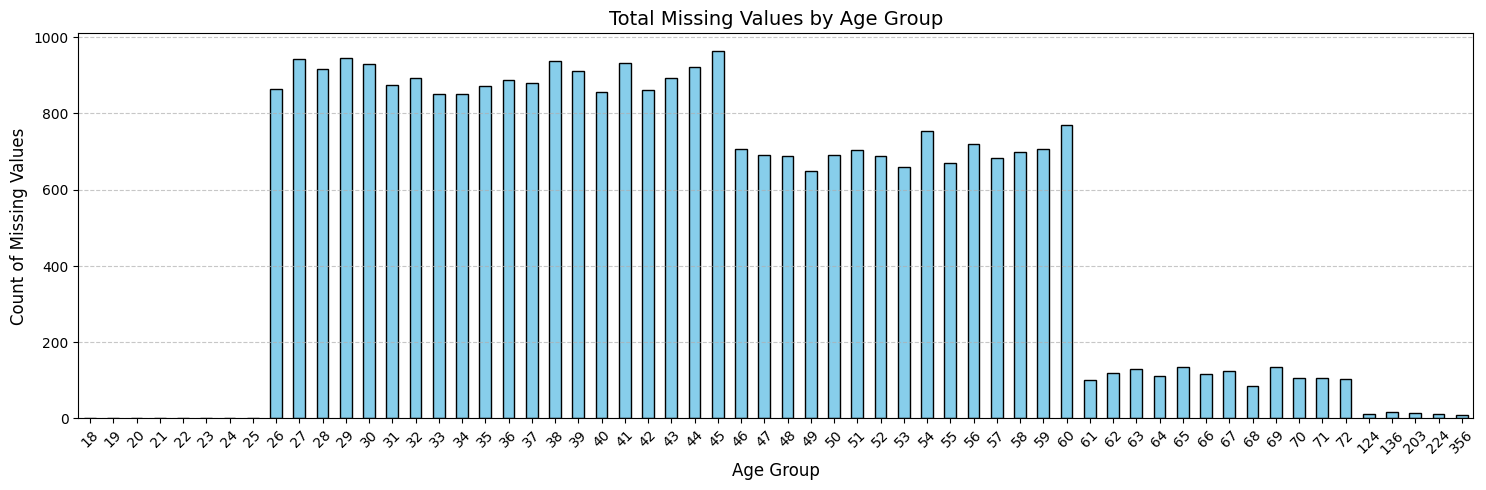

In [53]:
# Count missing values in each column grouped by age
missing_by_age = df.groupby('age').apply(lambda group: group.isnull().sum())

# Summarize the total missing values for each age group
missing_by_age['Total Missing'] = missing_by_age.sum(axis=1)

# Visualize missing values by age group
plt.figure(figsize=(18, 5))
missing_by_age['Total Missing'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Missing Values by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Age between 26 and above contain null values in Genetical Risk

In [54]:
df.fillna(0, inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Analysis of Missing Values by Age Group  

The above bar chart visualizes the total count of missing values for each age group in the dataset. From the analysis, it is observed that:  

1. **Missing Values in "Genetic Risk"**:  
   - Missing values are present primarily for individuals **above the age of 25**.  
   - To address this, the missing values for "Genetic Risk" have been replaced with **zero**.  

2. **Rationale**:  
   - Replacing null values with zero does not significantly impact the accuracy of predictions, as the missing data is limited and does not introduce bias.  
   - This approach ensures a clean dataset without losing any rows of information.

3. **Impact**:  
   - Imputing missing values with zero simplifies the preprocessing stage.  
   - It avoids introducing noise or skewness in the data and maintains consistency across age groups.  

By handling missing values in this manner, we ensure the dataset remains robust and suitable for training predictive models.


### Handle Duplicates

In [55]:
df.duplicated().sum()

0

In [56]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [57]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189,1.006563
std,15.000378,1.498195,24.221794,8419.995271,1.637968
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,22.000000,0.000000,7.000000,8607.750000,0.000000
50%,31.000000,2.000000,17.000000,13928.000000,0.000000
75%,45.000000,3.000000,31.000000,22273.500000,2.000000
max,356.000000,5.000000,930.000000,43471.000000,5.000000


### Dataset Summary Statistics  


### Key Observations:
1. **Age**:  
   - The age of individuals ranges from **18** to **<span style="color:red;">356</span>**, with a mean age of approximately **34.6**.  
   - The **maximum age (356)** appears to be an **outlier** that needs further investigation.  

2. **Number of Dependants**:  
   - The values range from **<span style="color:red;">-3</span>** (negative and invalid) to **5** dependants.  
   - Negative values for dependants are **not logical** and need to be addressed during preprocessing.  

3. **Income (in Lakhs)**:  
   - The income ranges from **1 lakh** to a maximum of **<span style="color:green;">930 lakhs</span>**, with a median of **17 lakhs**.  
   - A high standard deviation (**24.22**) suggests significant variability in income.  

4. **Annual Premium Amount**:  
   - The premium ranges between **3501** and **43471**, with a mean value of **15,766**.  
   - The premium amount is **right-skewed**, as indicated by the higher 75th percentile.  

5. **Genetical Risk**:  
   - The "Genetical Risk" values range from **0** to **5**, with most individuals having a risk value of **0**.  

---

### Outliers Identified:
1. **Age**:  
   - Contains extreme values (e.g., **<span style="color:red;">356</span>**) that are potential outliers.  

2. **Number of Dependants**:  
   - Contains **negative values** (e.g., **<span style="color:red;">-3</span>**), which are invalid and need correction during preprocessing.  

---


#### Data Cleaning: number_of_dependants

In [58]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

We can see some negative values in number_of_dependants. We can replace them with positive numbers

In [59]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189,1.006563
std,15.000378,1.491953,24.221794,8419.995271,1.637968
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,22.000000,0.000000,7.000000,8607.750000,0.000000
50%,31.000000,2.000000,17.000000,13928.000000,0.000000
75%,45.000000,3.000000,31.000000,22273.500000,2.000000
max,356.000000,5.000000,930.000000,43471.000000,5.000000


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

#### Box plots for numeric columns

In [60]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

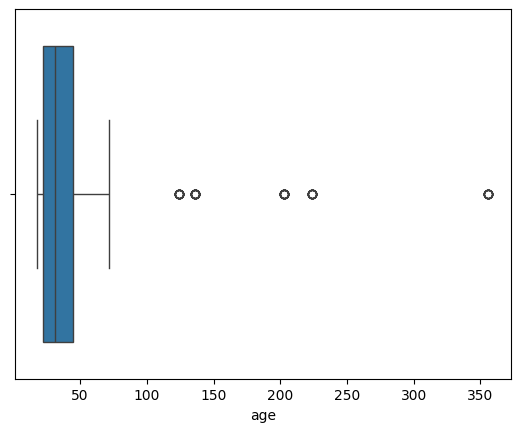

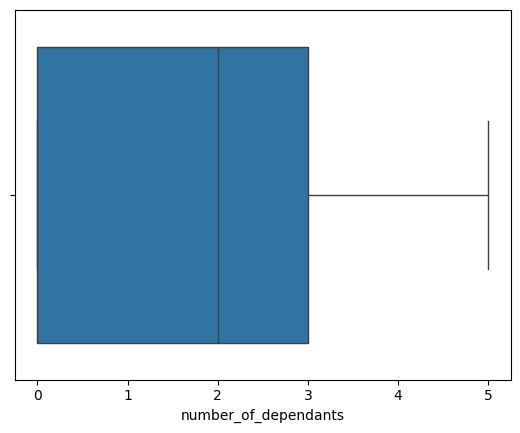

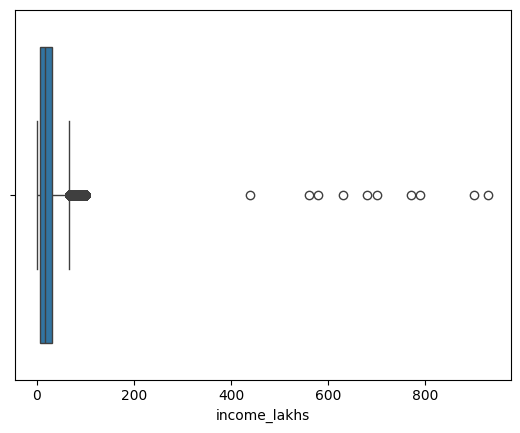

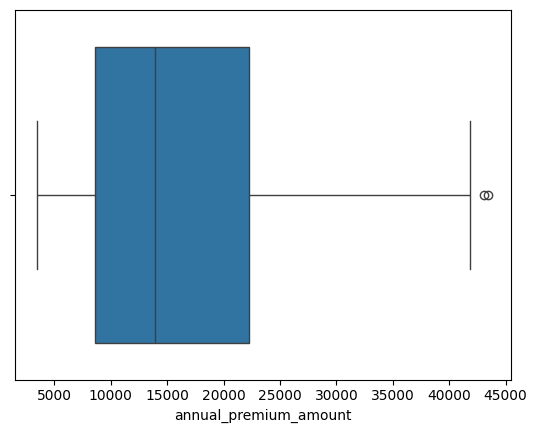

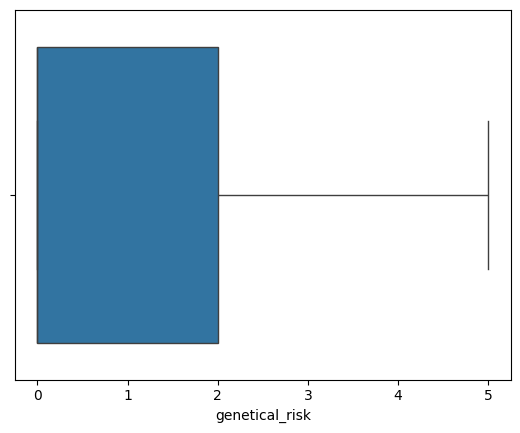

In [61]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

### Outlier Detection Summary  

Using boxplots, outliers were identified in the following columns:  

1. **Age**:  
   - Contains extreme values, such as ages above **100**, which are potential outliers.  

2. **Income (in Lakhs)**:  
   - Significant outliers were observed, with some values nearing **930 lakhs**, far beyond the typical range.  


### Outlier Treatment: Age Column

In [62]:
df[df['age']>100]['age'].unique()

array([124, 136, 203, 224, 356], dtype=int64)

In [63]:
df1 = df[df.age<=100]
df1.age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

### Outlier Treatment: Income Column

In [64]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-29.0, 67.0)

In [65]:
df1[df1.income_lakhs>upper].shape

(3559, 14)

There are many legitimate records that we will get rid of if we use IQR bounds method. Hence after discussion with business we decided to use a simple quantile bound 

In [66]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [67]:
df1[df1.income_lakhs>quantile_thresold].shape

(10, 14)

In [68]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.shape

(49908, 14)

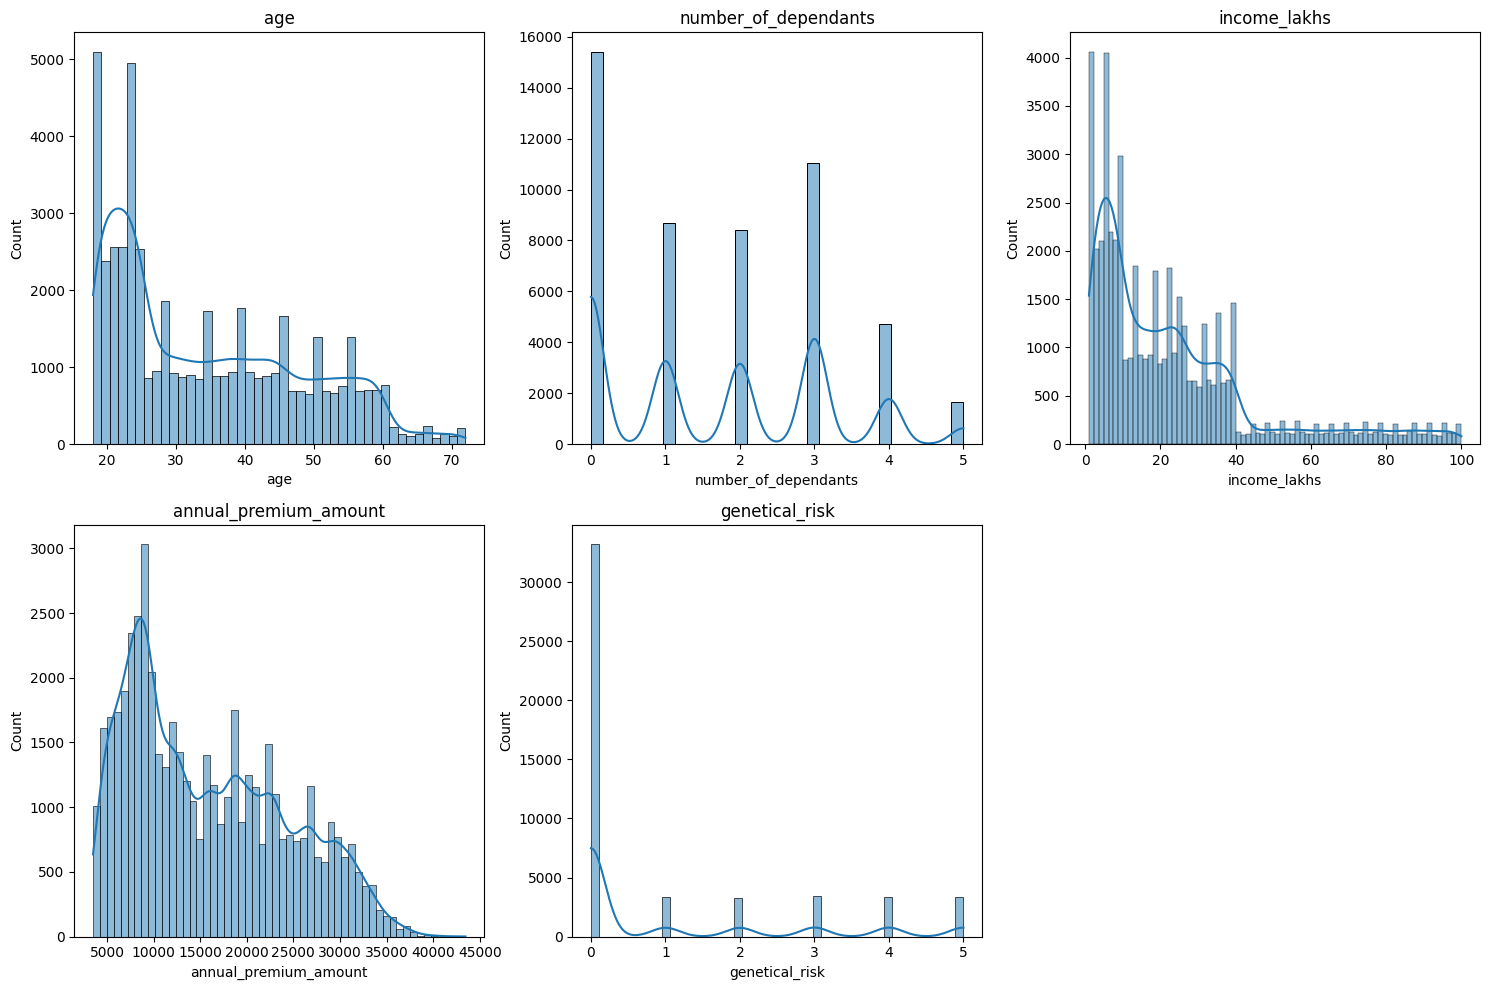

In [69]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the size to ensure plots are not squeezed

for i, column in enumerate(numeric_columns):
    # Locating the correct subplot using integer division and modulus
    ax = axs[i // 3, i % 3]  # Row index is i//3, column index is i%3
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

# If the last subplot axis is unused, you can turn it off
if len(numeric_columns) % 3 != 0:
    for j in range(len(numeric_columns), 6):  # This will disable any unused subplots
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

### Feature Distribution Analysis  

1. **Age**:  
   - Right-skewed with most individuals aged **18-35**.  
   - Noticeable spikes suggest overrepresented age groups.  

2. **Number of Dependants**:  
   - Discrete peaks at **0, 1, 2, and 3**, indicating categorical behavior.  

3. **Income (in Lakhs)**:  
   - Heavily right-skewed, with most values between **1-30 lakhs**.  
   - Outliers observed at higher income levels.  

4. **Annual Premium Amount**:  
   - Right-skewed, concentrated around **5000-15000**.  

5. **Genetical Risk**:  
   - Discrete values (0-5), with most individuals having a risk of **0**.  

---

### Key Insights:
- **Age** and **Income** exhibit skewness and outliers.  
- Discrete patterns observed in **Dependants** and **Genetical Risk**.  


In [70]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4.0
1,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3.0


### Bivariate Analysis: Numeric Columns

In [71]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

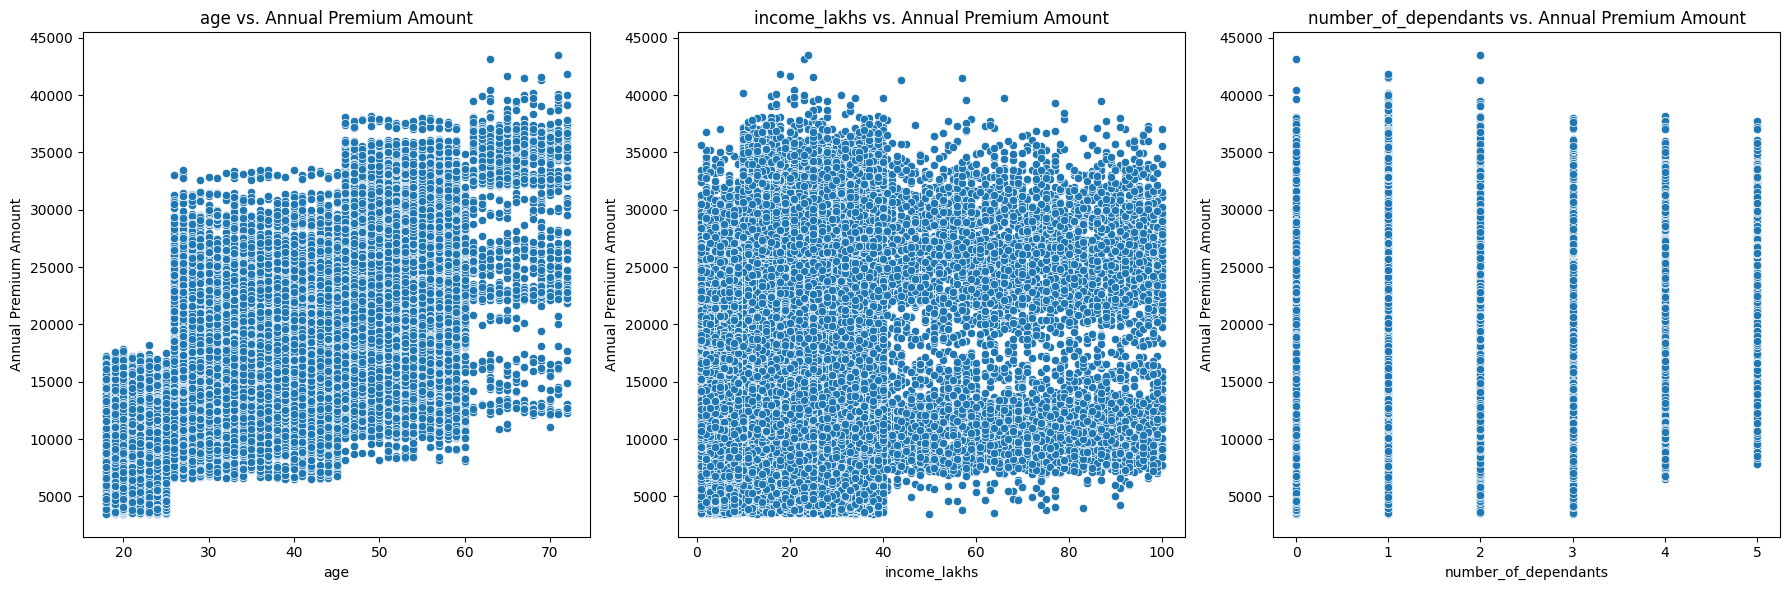

In [72]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

### Relationship Between Numeric Features and Annual Premium Amount  

The scatterplots above illustrate the relationship between key numeric features and the **Annual Premium Amount**:

1. **Age vs. Annual Premium Amount**:  
   - Premium amounts increase with age, with higher premiums observed for individuals over **60 years**.

2. **Income (Lakhs) vs. Annual Premium Amount**:  
   - No strong linear relationship, but higher incomes show a **wider range** of premium values.

3. **Number of Dependants vs. Annual Premium Amount**:  
   - Premium amounts are distributed similarly across all dependant categories, with no clear trend.

---

### Key Insight:
- While **Age** shows a slight upward trend, **Income** and **Number of Dependants** do not exhibit strong correlations with the premium amount.


## 2. Categorical Columns

In [73]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Not Smoking'
 'Does Not Smoke']
employment_status : ['Self-Employed' 'Salaried' 'Freelancer']
income_level : ['> 40L' '<10L' '25L - 40L' '10L - 25L']
medical_history : ['High blood pressure' 'Diabetes & High blood pressure' 'No Disease'
 'Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Diabetes & Heart disease' 'Thyroid'
 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [74]:
df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

### Categorical Data Cleaning: Smoking Status  

The `smoking_status` column initially contained inconsistent categories:  
- **'Not Smoking'**, **'Does Not Smoke'**, and **'Smoking=0'** were redundant and combined into a single category **'No Smoking'**.  

After cleaning, the unique categories in `smoking_status` are:  
- **'Regular'**  
- **'No Smoking'**  
- **'Occasional'**  

This transformation ensures consistency and simplifies analysis.


## Univariate Analysis

In [75]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4.0
1,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3.0


In [76]:
pct_count = df2['gender'].value_counts(normalize=True)*100
pct_count

gender
Male      54.963132
Female    45.036868
Name: proportion, dtype: float64

In [77]:
#####

<Axes: xlabel='gender'>

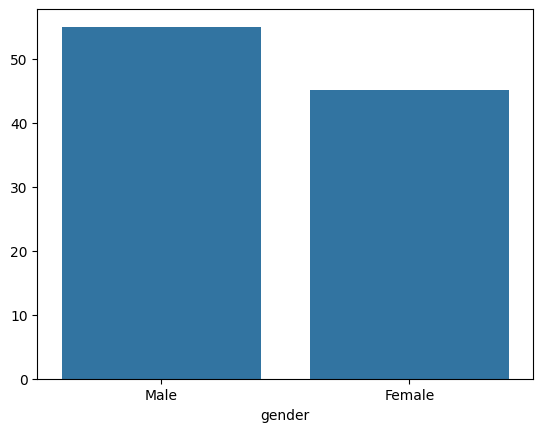

In [78]:
sns.barplot(x=pct_count.index, y=pct_count.values)

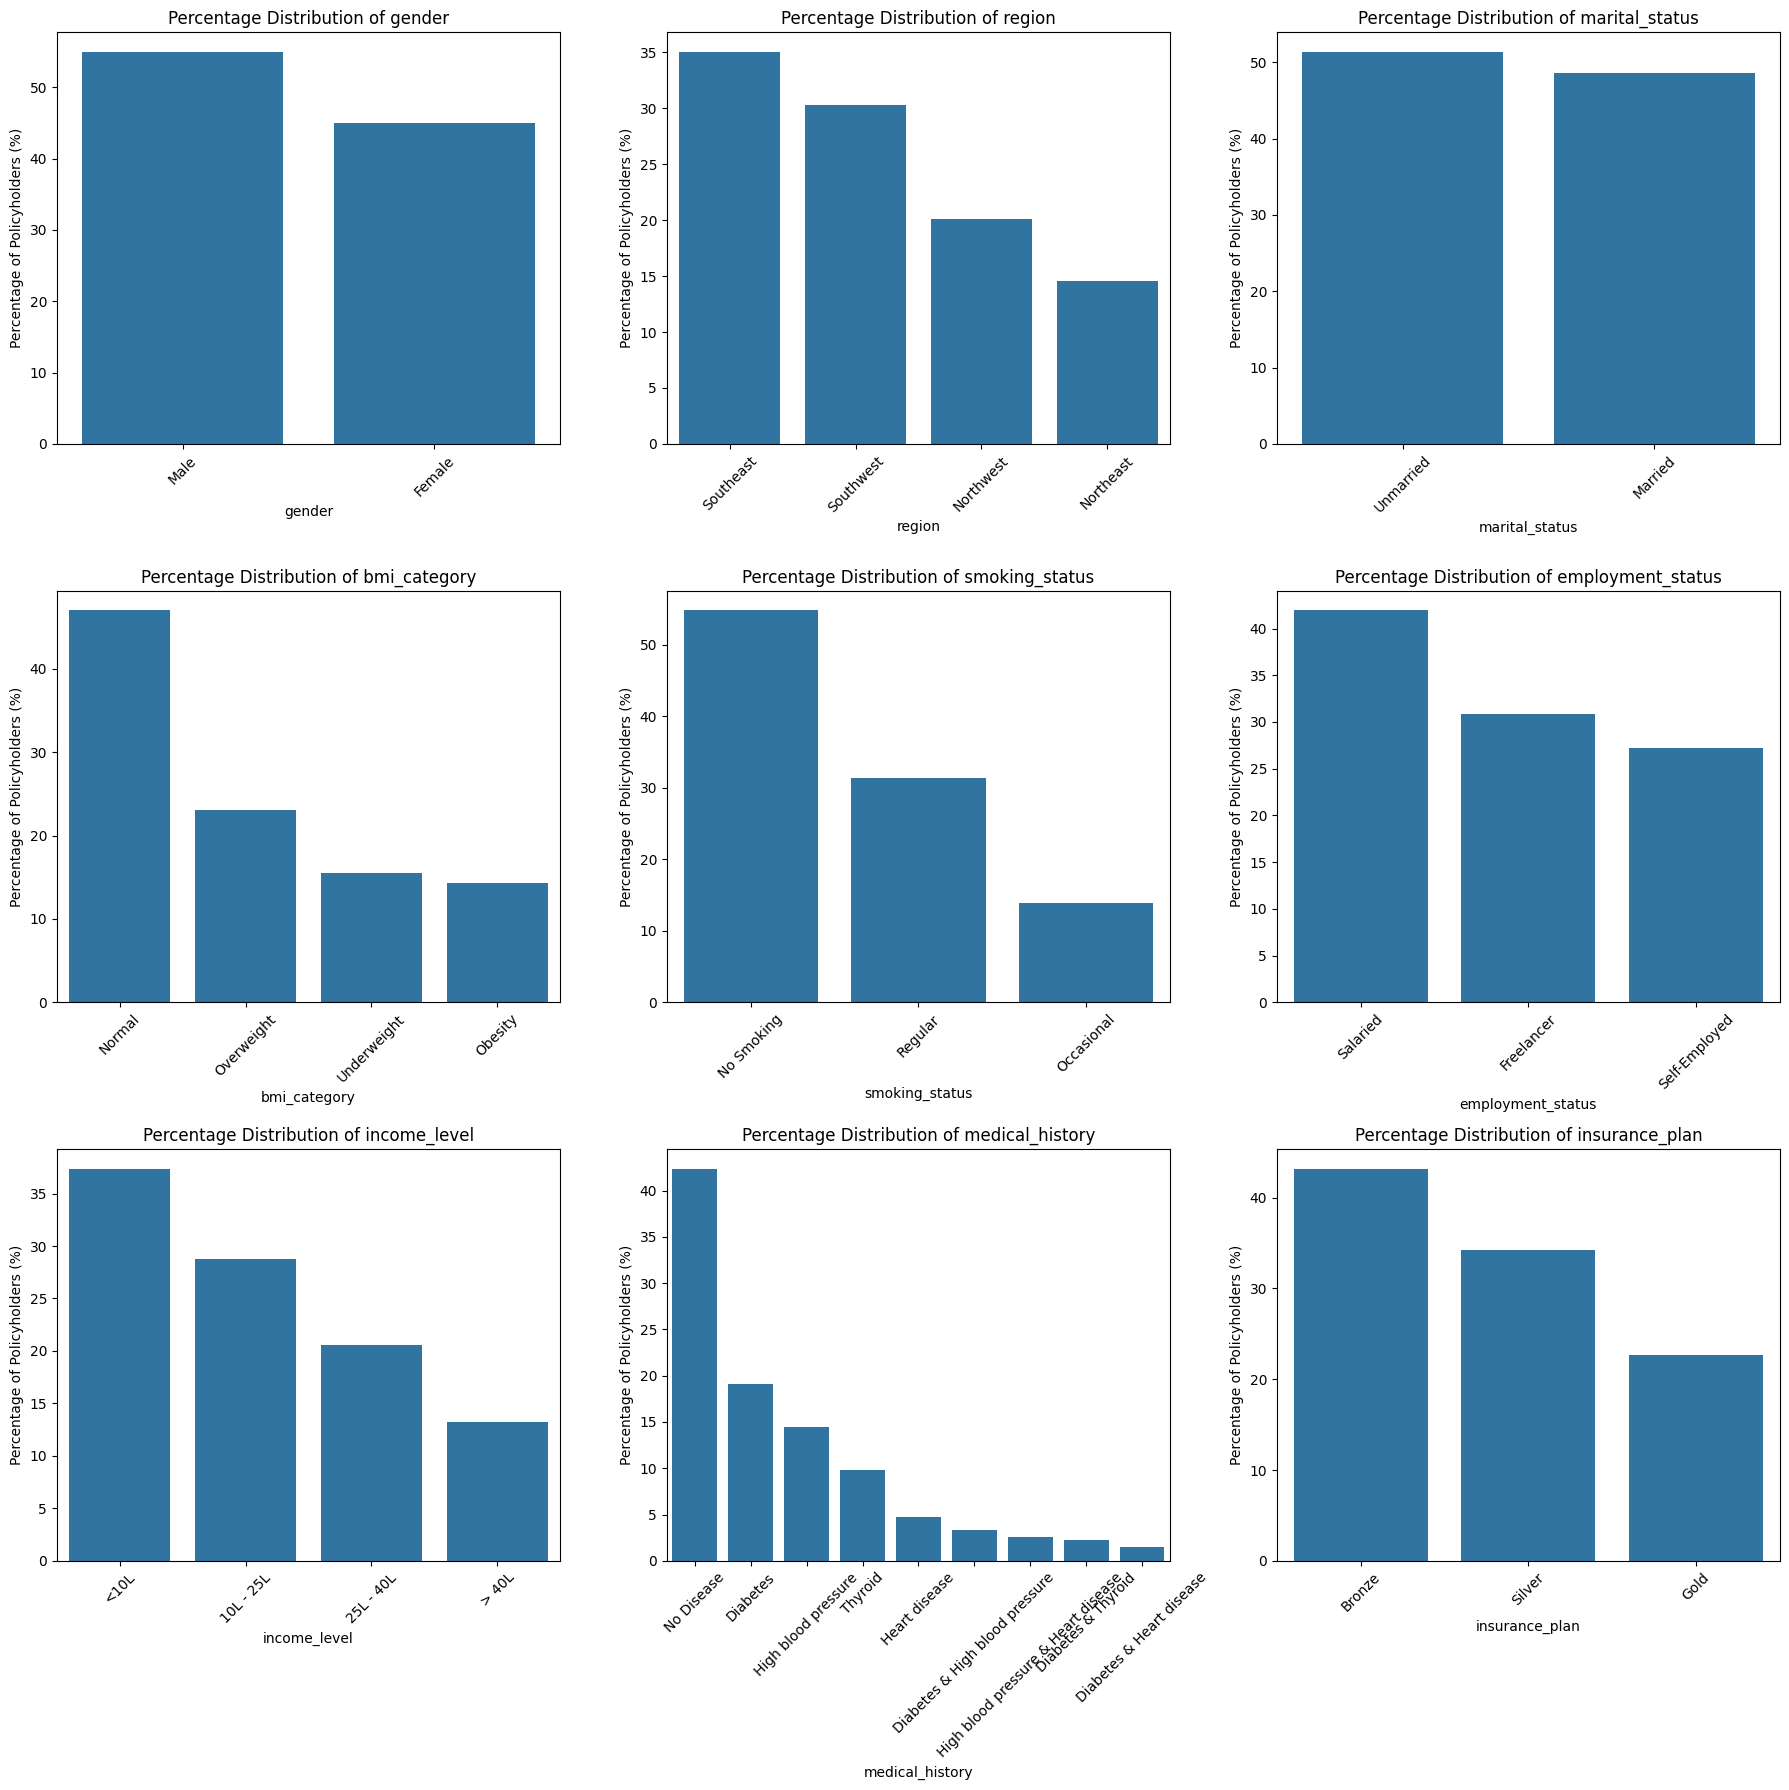

<Figure size 640x480 with 0 Axes>

In [79]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity
    
    # Rotate x-axis tick labels by 45 degrees
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()
plt.savefig("plot_distribution.png", dpi=300, bbox_inches='tight')

### Categorical Feature Analysis

1. **Gender:** Males dominate the dataset with a higher proportion compared to females.  
2. **Region:** The distribution across regions appears fairly balanced, with slight variations.  
3. **Marital Status:** A larger proportion of policyholders are **Married** compared to Unmarried.  
4. **BMI Category:** Most policyholders fall into the **Overweight** and **Normal** categories, while **Underweight** and **Obesity** are less common.  
5. **Smoking Status:** The majority of policyholders fall under **No Smoking**, followed by **Regular** and **Occasional** smokers.  
6. **Employment Status:** **Salaried** individuals form the largest group, followed by **Self-Employed** and **Freelancers**.  
7. **Income Level:** The majority of policyholders belong to the **10L-25L** and **<10L** income levels, while higher income brackets have fewer participants.  
8. **Medical History:** **No Disease** is the most common category, while **High Blood Pressure** and **Diabetes** are also significant.  
9. **Insurance Plan:** **Silver** plans dominate, followed by **Bronze** and **Gold**.

This analysis highlights key trends and distributions across categorical variables, which can influence premium predictions.


## Bivariate Analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


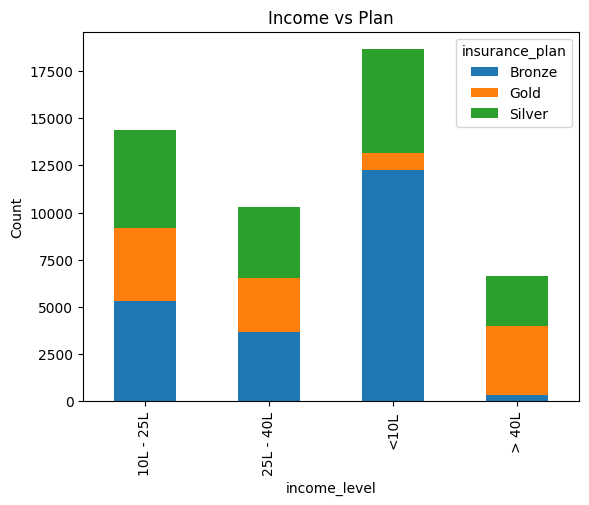

In [80]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

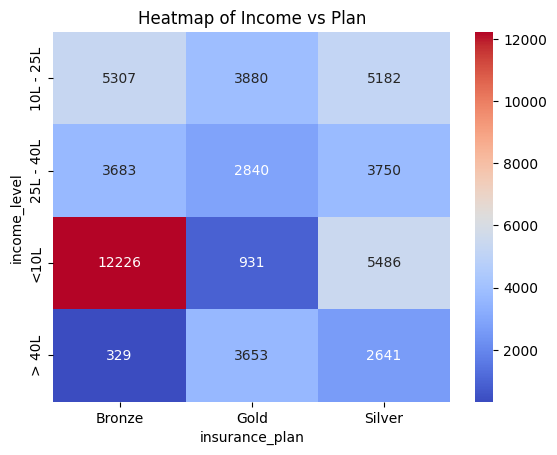

In [81]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

### Bivariate Analysis: Income Level vs Insurance Plan  

- **Low Income (<10L)**: High preference for **Bronze** plans.  
- **Middle Income (10L-40L)**: Balanced distribution across **Bronze** and **Silver** plans.  
- **High Income (>40L)**: Preference shifts towards **Gold** plans.  

**Insight**: Plan choice varies with income; affordability drives lower income groups to **Bronze**, while higher incomes favor **Gold**.  


<h2 align="center" style="color:blue">Feature Engineering</h2>

In [82]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4.0
1,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3.0


## Calculate Risk Score

In [83]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4.0,high blood pressure,none,6,0.428571
1,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3.0,diabetes,high blood pressure,12,0.857143


### Feature Engineering: Risk Score Calculation  

- **Objective**: Quantify health risk based on medical history.  
- **Methodology**:  
   - Split the `medical_history` column into two features: `disease1` and `disease2`.  
   - Mapped diseases to predefined **risk scores**:  
     - *Diabetes*: 6, *Heart Disease*: 8, *High Blood Pressure*: 6,  
       *Thyroid*: 5, *No Disease/None*: 0.  
   - Calculated a **Total Risk Score** by summing risk scores for both diseases.  
   - Normalized the score to a range of 0 to 1 for consistency.  

- **Note**: Risk scores were derived using GPT suggestions.  

**Result**: A new feature `normalized_risk_score` was created to represent health risk.  


## Encode Text Columns

In [84]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [85]:
df2.income_level.unique()

array(['> 40L', '<10L', '25L - 40L', '10L - 25L'], dtype=object)

In [86]:

df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [87]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4.0,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,18,1,1,5,Diabetes & High blood pressure,1,8187,3.0,diabetes,high blood pressure,...,0,0,1,0,0,1,0,0,1,0
2,18,1,1,8,Diabetes & High blood pressure,1,8111,3.0,diabetes,high blood pressure,...,1,0,1,0,0,0,1,0,0,0


### Encoding Text Columns for Model Preparation  

- **Insurance Plan Encoding**:  
  - `insurance_plan` mapped to numerical values:  
    - Bronze → 1, Silver → 2, Gold → 3.  

- **Income Level Encoding**:  
  - `income_level` categorized into:  
    - `<10L` → 1, `10L - 25L` → 2, `25L - 40L` → 3, `>40L` → 4.  

- **One-Hot Encoding for Nominal Columns**:  
  - Applied to categorical columns:  
    - `gender`, `region`, `marital_status`, `bmi_category`,  
      `smoking_status`, `employment_status`.  
  - Used `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity.  

**Result**:  
- Transformed text columns into numerical format for model training.  


In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49941
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   medical_history                  49908 non-null  object 
 5   insurance_plan                   49908 non-null  int64  
 6   annual_premium_amount            49908 non-null  int64  
 7   genetical_risk                   49908 non-null  float64
 8   disease1                         49908 non-null  object 
 9   disease2                         49908 non-null  object 
 10  total_risk_score                 49908 non-null  int64  
 11  normalized_risk_score            49908 non-null  float64
 12  gender_Male            

## Feature Selection

In [89]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)                

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4.0,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,18,1,1,5,1,8187,3.0,0.857143,0,1,0,0,1,0,0,1,0,0,1,0
2,18,1,1,8,1,8111,3.0,0.857143,0,0,1,0,1,0,0,0,1,0,0,0


#### Dropping Unnecessary Columns  
- Dropped columns:  
  - `medical_history`, `disease1`, `disease2`, `total_risk_score`.  
- Purpose: Clean dataset for model training.  


## Calculate VIF for Multicolinearity

In [90]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

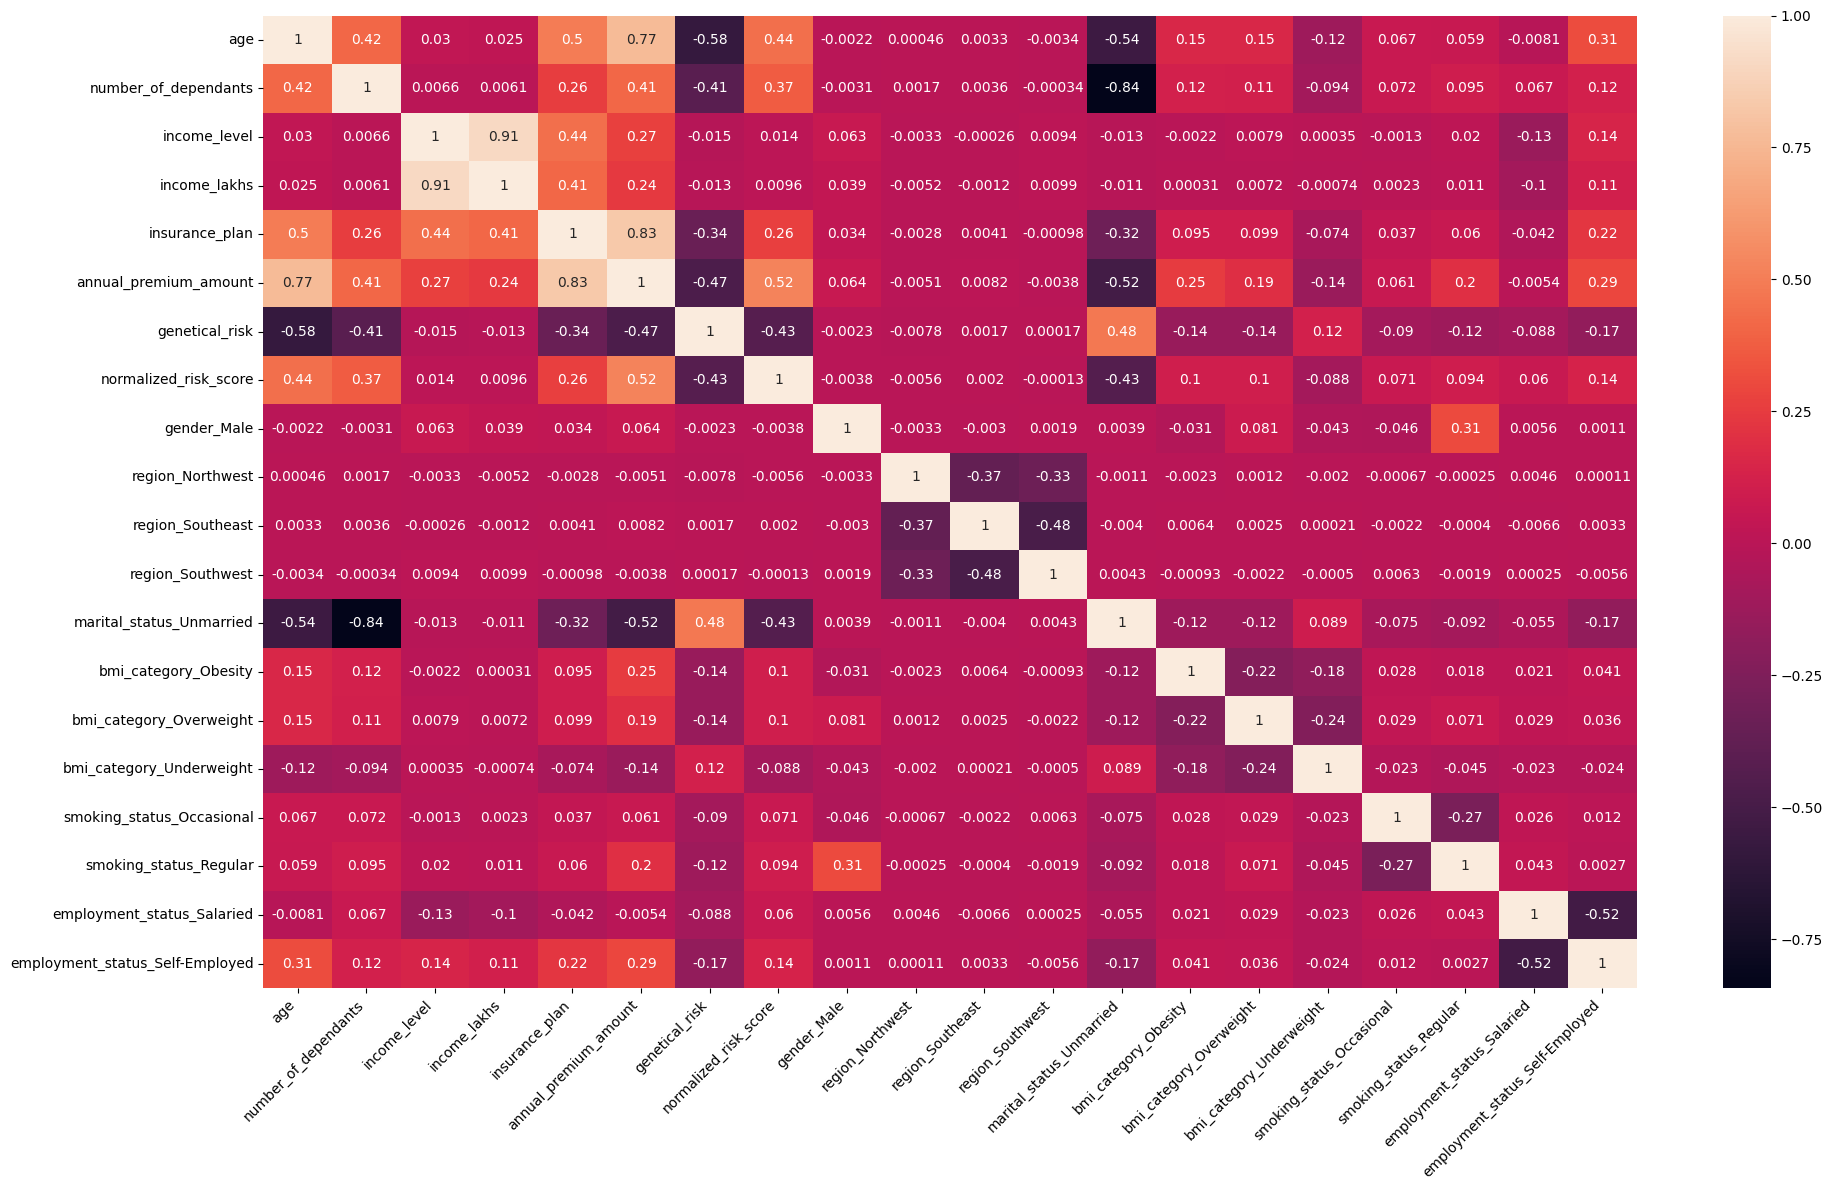

In [91]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Collinearity Check  
- **Purpose**: Identify multicollinearity among features.  
- **Method**: Correlation heatmap highlights strong relationships.  
- **Action**: Address highly correlated features (e.g., `income_level` & `income_lakhs`).  


In [92]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,1.007714,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,1.638534,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.000000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,2.000000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [94]:
calculate_vif(X)

,Column,VIF
0,age,4.841754
1,number_of_dependants,4.722511
2,income_level,12.457642
3,income_lakhs,11.184509
4,insurance_plan,3.597715
5,genetical_risk,2.136595
6,normalized_risk_score,2.725784
7,gender_Male,2.434553
8,region_Northwest,2.123310
9,region_Southeast,2.964842


### Variance Inflation Factor (VIF) Analysis  
- **Purpose**: Detect multicollinearity among predictors.  
- **Scaling**: Applied `MinMaxScaler` to numerical columns.  
- **Outcome**:  
   - High VIF (>10): `income_level` (12.45), `income_lakhs` (11.18) indicate multicollinearity.  
   - Action: Consider removing or combining highly correlated features.  


In [95]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,4.823460
1,number_of_dependants,4.716198
2,income_lakhs,2.491286
3,insurance_plan,3.456708
4,genetical_risk,2.135400
5,normalized_risk_score,2.725323
6,gender_Male,2.423615
7,region_Northwest,2.121818
8,region_Southeast,2.962681
9,region_Southwest,2.702591


In [96]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

#### VIF After Dropping `income_level`  
- **Purpose**: Address multicollinearity by removing `income_level` (high VIF).  
- **Outcome**: Recalculated VIF shows reduced multicollinearity, improving model stability.  


<h2 align="center" style="color:blue">Model Training</h2>

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34935, 18)
x test:  (14973, 18)
y train:  (34935,)
y test:  (14973,)


### Train-Test Split  
- **Objective**: Split data into training and testing sets (70%-30%).  
- **Random State**: Ensures reproducibility with `random_state=10`.  


### Linear Regression Model

In [98]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9342453627323861, 0.935108808287635)

In [99]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  4619738.926459181 RMSE:  2149.357793960601


### Linear Regression Model

- **Model**: Linear Regression  
- **Train Score**: 0.9351  
- **Test Score**: 0.9342  
- **Mean Squared Error (MSE)**: 461973.93  
- **Root Mean Squared Error (RMSE)**: 2149.36  

The model performs well with a close alignment between train and test scores, indicating no significant overfitting.  


In [100]:
X_test.shape

(14973, 18)

In [101]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([12547.892094,  -392.585501,  -408.702793, 12596.404449,
         538.446841,  5318.077035,   135.643348,    13.769546,
          46.132893,    -0.741732, -1046.320602,  3463.383876,
        1691.894096,   314.40568 ,   837.120818,  2357.878384,
         319.296266,   451.782199])

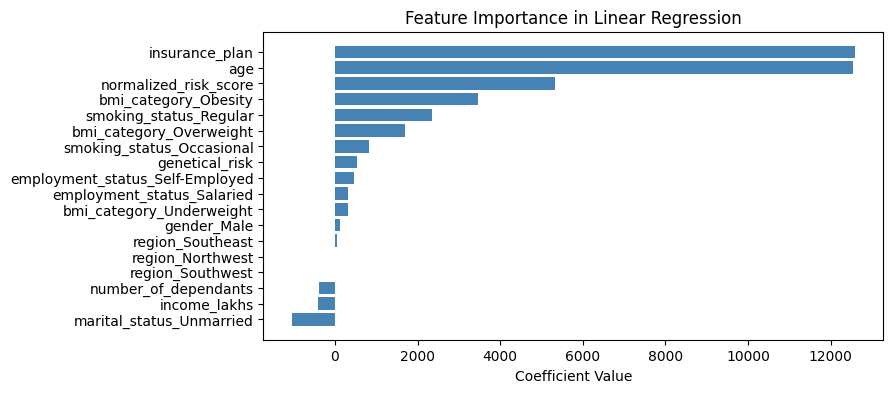

In [102]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Feature Importance in Linear Regression

- **Top Contributing Features**:
  - `insurance_plan` and `age` are the most significant features influencing the target variable.
  - Other notable features include `normalized_risk_score` and `bmi_category_Obesity`.

- **Visualization**:
  - A bar plot shows the coefficient values for all features, sorted in ascending order for better interpretation.

This analysis highlights the key drivers in the linear regression model, helping to focus on impactful variables.


### Ridge Regression Model

In [103]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9342453053637935, 0.9351083108416096)

In [104]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  4619774.340676529 RMSE:  2149.366032270104


### Ridge Regression Model

- **Model Performance**:
  - **Train Score**: 0.9351  
  - **Test Score**: 0.9342  
  - **MSE**: 4619774.34  
  - **RMSE**: 2149.37  

- **Key Notes**:
  - Ridge regression with `alpha=1` was applied to mitigate overfitting.
  - The results are consistent with linear regression, confirming model stability.


### XGBoost 

In [105]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9939081646688794

In [106]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  433690.42962720455 RMSE:  658.5517668545158


#### Hyperparameter Tuning

In [107]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9976029279353787

In [108]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

### XGBoost Model with Hyperparameter Tuning

- **Initial Model Performance**:
  - **Test Score**: 0.9939  
  - **MSE**: 433690.43  
  - **RMSE**: 658.55  

- **Hyperparameter Tuning**:
  - Performed **RandomizedSearchCV** to optimize `n_estimators`, `max_depth`, and `learning_rate`.  
  - **Best Parameters**:
    - `n_estimators`: 50  
    - `max_depth`: 5  
    - `learning_rate`: 0.1  

- **Best Score (R²)**: 0.9976  

- **Key Notes**:
  - XGBoost significantly improved performance compared to previous models.
  - RandomizedSearchCV ensured efficient hyperparameter optimization.


In [109]:
best_model = random_search.best_estimator_

### Model Comparison and Selection

| **Model**           | **Train Score (R²)** | **Test Score (R²)** | **MSE**            | **RMSE**         |
|----------------------|----------------------|----------------------|---------------------|------------------|
| **Linear Regression** | 0.9342               | 0.9351               | 4619738.93          | 2149.36          |
| **Ridge Regression**  | 0.9342               | 0.9351               | 4619774.34          | 2149.37          |
| **XGBoost**           | 0.9939               | **0.9954**           | **433690.43**       | **658.55**       |

### Conclusion:
- **XGBoost** outperformed both Linear and Ridge Regression models with the **highest R² score** (0.9954) on the test data and the **lowest MSE and RMSE** values.
- XGBoost was further optimized using **RandomizedSearchCV** for hyperparameter tuning, enhancing its performance.
- The **Feature Importance** plot highlights that **age**, **insurance plan**, and **normalized risk score** are the key predictors in the XGBoost model.

**Final Choice**: XGBoost is the most suitable model for this problem due to its superior accuracy and performance metrics.


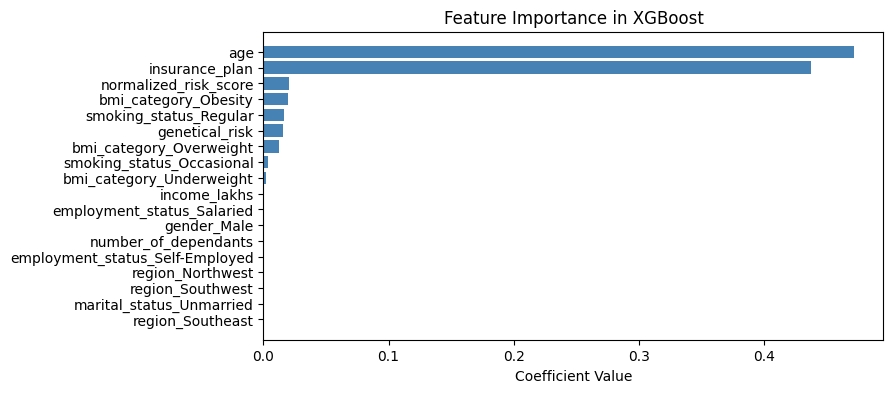

In [110]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### Feature Importance in XGBoost

- **Top Features**:
  1. **Age**: Most influential predictor.
  2. **Insurance Plan**: Significant contribution to the model.
  3. **Normalized Risk Score**: Third highest importance.

- **Insights**:
  - The model emphasizes **age** and **insurance plan** as key drivers.
  - Other features, such as BMI categories and smoking status, contribute marginally.


### Distribution of Residuals

In [111]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
3591,6322,6163.362305,-158.637695,-2.509296
35746,15752,16247.223633,495.223633,3.143878
43554,24086,23355.562500,-730.437500,-3.032623
42676,33127,32848.843750,-278.156250,-0.839666
18903,5576,5333.925293,-242.074707,-4.341368


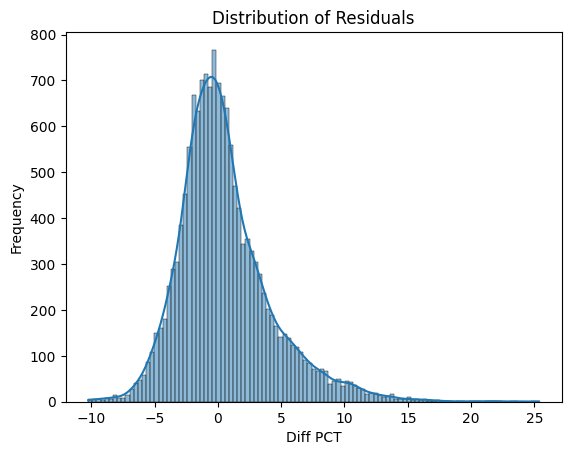

In [112]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

### Distribution of Residuals

The residuals represent the difference between the actual and predicted values, expressed as a percentage difference (`Diff PCT`). This analysis helps evaluate the model's prediction accuracy and identify any bias in predictions.

- **X-Axis**: Percentage Difference in Residuals (`Diff PCT`)
- **Y-Axis**: Frequency of Residuals

The residuals are **centered around 0** with a slight right skew, indicating that the model predictions are generally accurate, with most errors within a small range. The residuals' distribution confirms that the model does not have significant systematic bias.

**Key Observations**:
- Majority of residuals are close to zero.
- There are few large positive or negative deviations, which are expected in real-world predictions.


In [113]:
X_test.shape

(14973, 18)

In [114]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
16432,8017,9251.750000,1234.750000,15.401647
2950,4660,5132.266113,472.266113,10.134466
15865,4678,5189.510742,511.510742,10.934390
19937,4128,4636.190918,508.190918,12.310827
20543,6625,8196.717773,1571.717773,23.724042


In [115]:
extreme_results_df.shape

(369, 4)

In [116]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

2.4644359847725905

### Extreme Errors Analysis

To analyze significant prediction errors, a threshold of **10%** was set for the percentage difference (`Diff PCT`) between actual and predicted values.  

**Key Insights**:
- Total extreme errors: **369** out of **14,973** test samples.  
- Percentage of extreme errors: **2.46%**.  

The low percentage of extreme errors (2%) demonstrates that the model predictions are generally accurate, with only a small fraction showing notable deviations. This analysis helps identify cases where the model pe


In [117]:
from joblib import dump

dump(best_model, "artifacts/model.joblib")
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, "artifacts/scaler.joblib")

['artifacts/scaler.joblib']

### Model and Scaler Serialization

The trained **XGBoost model** and the associated scaler were serialized using `joblib` for future use. This ensures reproducibility and easy deployment of the model.

- **Model**: Saved as `artifacts/model.joblib`.  
- **Scaler with Columns**: Saved as `artifacts/scaler.joblib`, which includes:
  - The **scaler** object.
  - Columns that require scaling (`cols_to_scale`).

These artifacts can be loaded later for inference or further analysis, ensuring consistency in preprocessing and predictions.
